In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#Lectura del la imágen .tif
img = cv2.imread('img/rm_149_004.tif',0)

#Aplicación de Threshold adaptativo
mean = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,15)
gaussian = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,15)

#Para invertir colores
#gaussian = 255 - gaussian

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3));
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3));

#Transformaciones morfológicas
eroding = cv2.erode(mean,kernel2,iterations = 2)
dilation = cv2.dilate(eroding,kernel2,iterations = 2)

#Se guardan los imagenes en cada paso
cv2.imwrite('tests/1_UmbralMean.png',gaussian)
cv2.imwrite('tests/2_UmbralGauss.png',gaussian)
cv2.imwrite('tests/3_Erode.png',eroding)
cv2.imwrite('tests/4_Dilate.png',dilation)

True

101.18969849246231
10.059309046473436
2388
42


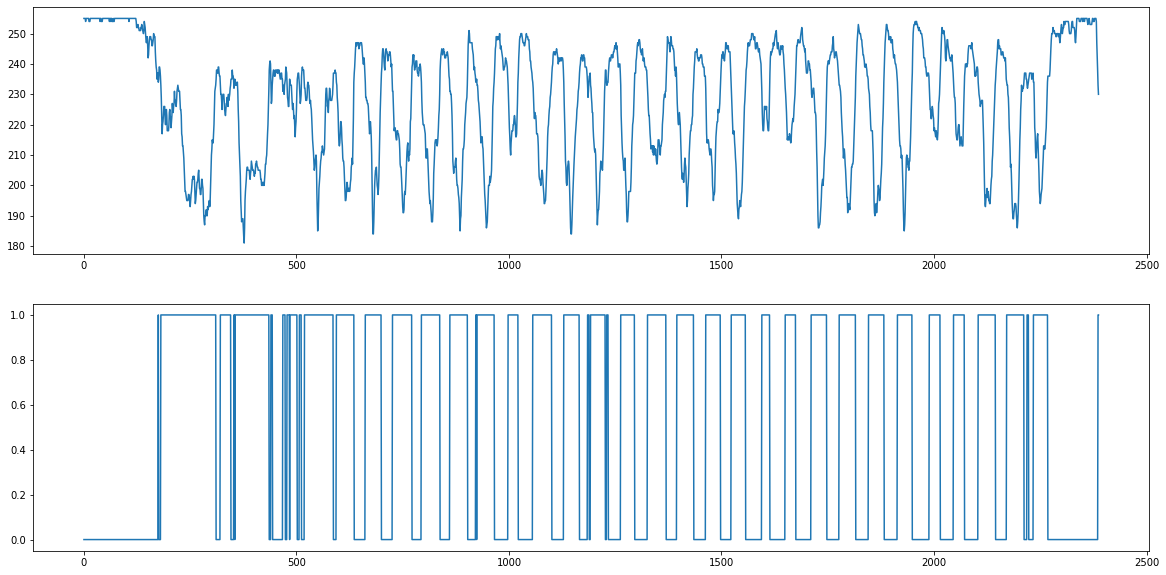

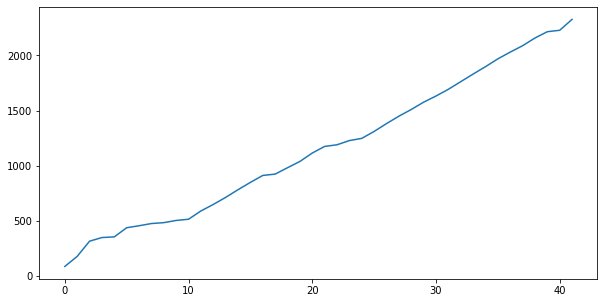

In [3]:
#Se obtiene el valor promedio de cada fila de pixeles de la imagen
reduced = cv2.reduce(dilation, 1, cv2.REDUCE_AVG)

#Se establece un límite para determinar si hay texto o no
limit = np.sqrt(np.mean(reduced**2))
print(np.mean(reduced**2))
print(limit)
limit = 235 #227

#Algoritmo para determinar los límites de cada linea del texto

#1.Creación de vector que indica la presencia o no de texto
cnt = 0
vector = np.zeros(len(reduced))
for avg in reduced:
    if avg < limit:
        vector[cnt] = 1
    else:
        vector[cnt] = 0
    cnt=cnt+1
print(cnt)
#2.Conteo de líneas en el texto
lines = 0
last = 0
for i in range(len(vector)):
    if last == 0:
        if vector[i]==1:
            lines = lines +1
    last = vector[i]
print(lines)
#Creación de vector donde se guardan las filas de 
#pixeles que dividen cada linea de texto
start = 0
divs = np.zeros(lines)
last = 1
line = 0
for i in range(len(vector)):
    if last == 1:
        if vector[i]==0:
            start = i
    elif last == 0:
        if vector[i]==1:
            divs[line] = int((start+i)//2)
            line = line+1
    last = vector[i]

#Figuras de comprobación
plt.figure(1,figsize=(20, 10))

plt.subplot(211)
plt.plot(reduced)
plt.subplot(212)
plt.plot(vector)

plt.figure(2,figsize=(10, 5))
plt.plot(divs)
    

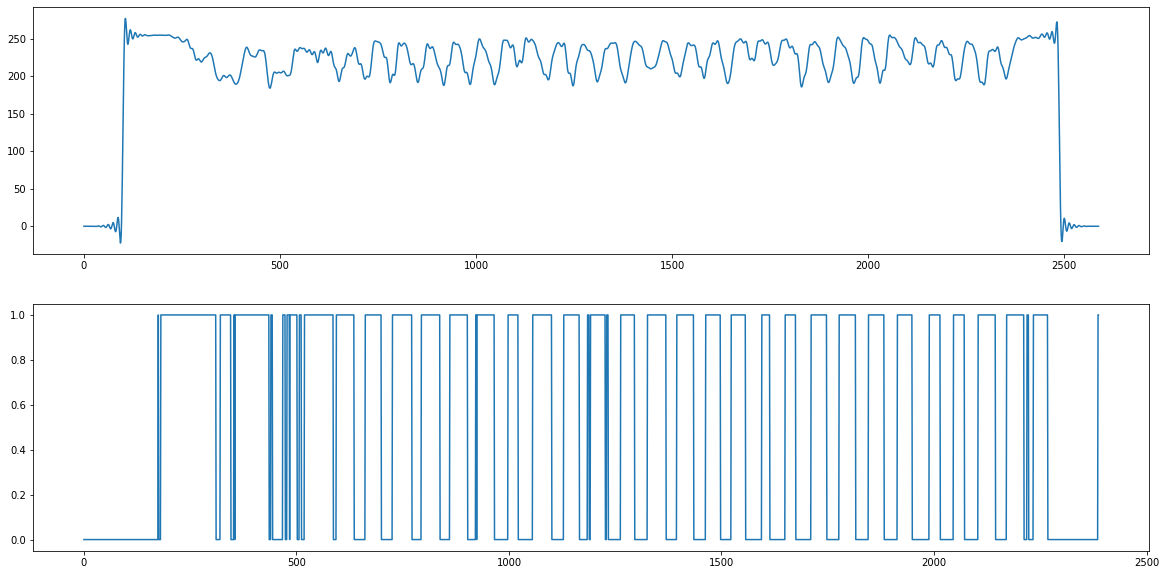

In [11]:
#Filtro pasa bajos
fc = 0.08
b = 0.02
N = int(np.ceil((4 / b)))
if not N % 2: N += 1
n = np.arange(N)

sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
window = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))
sinc_func = sinc_func * window
sinc_func = sinc_func / np.sum(sinc_func)

reduced1D=np.ndarray.flatten(reduced)

s = list(reduced1D)
filtered = np.convolve(s, sinc_func)

plt.figure(1,figsize=(20, 10))

plt.subplot(211)
plt.plot(filtered)
plt.subplot(212)
plt.plot(vector)


In [3]:
#Algoritmo para extraer imagenes de cada una de la filas

#Se establece un márgen para evitar letras cortadas(Ejemplo: Titulo)
margin = 30
#Se extrae la matriz de pixeles de la linea 
cropped = dilation[int(divs[0])-margin:int(divs[1])+margin, 0:1577]
#Se guarda la linea en archivo .png
cv2.imwrite('tests/5_croppedTitle.png',cropped)

#Se establece un márgen para evitar letras cortadas (Ejemplo: linea normal)
margin = 15
#Se extrae la matriz de pixeles de la linea (Ejemplo: Titulo)
cropped = dilation[int(divs[1])-margin:int(divs[2])+margin, 0:1577]
#Se guarda la linea en archivo .png
cv2.imwrite('tests/6_croppedLine.png',cropped)

#Se establece un márgen para evitar letras cortadas (Ejemplo: linea normal)
margin = 15
#Se extrae la matriz de pixeles de la linea (Ejemplo: Titulo)
cropped = dilation[int(divs[2])-margin:int(divs[3])+margin, 0:1577]
#Se guarda la linea en archivo .png
cv2.imwrite('tests/7_croppedLine.png',cropped)

#Se establece un márgen para evitar letras cortadas (Ejemplo: linea normal)
margin = 15
#Se extrae la matriz de pixeles de la linea (Ejemplo: Titulo)
cropped = dilation[int(divs[3])-margin:int(divs[4])+margin, 0:1577]
#Se guarda la linea en archivo .png
cv2.imwrite('tests/8_croppedLine.png',cropped)


True